In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")
print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/feyzazkefe/trashnet/versions/1


In [ ]:
# 1. Chargement et organisation des données
import os
from PIL import Image

dataset_dir = dataset_dir = os.path.join(path, "dataset-resized")
classes = os.listdir(dataset_dir)

# Charger les chemins d'images et labels
image_paths = []
labels = []
for cls in classes:
    cls_path = os.path.join(dataset_dir, cls)
    for img_name in os.listdir(cls_path):
        image_paths.append(os.path.join(cls_path, img_name))
        labels.append(cls)

print(f"Nombre total d'images : {len(image_paths)}")
print(f"Classes : {classes}")

Nombre total d'images : 2527
Classes : ['trash', 'metal', 'glass', 'cardboard', 'paper', 'plastic']


In [9]:
# 2. Séparation train/val/test
from sklearn.model_selection import train_test_split

train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)

print(f"Train : {len(train_paths)} | Val : {len(val_paths)} | Test : {len(test_paths)}")

Train : 1616 | Val : 405 | Test : 506


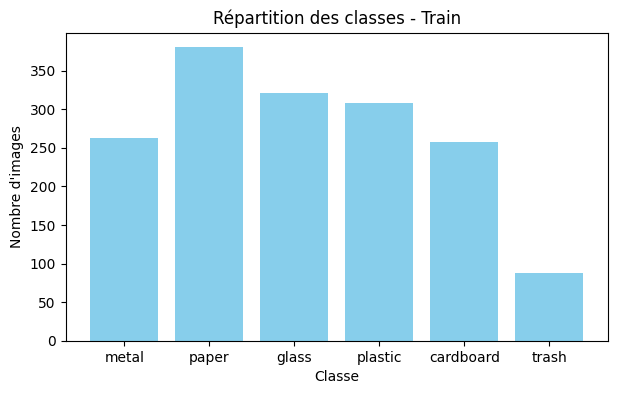

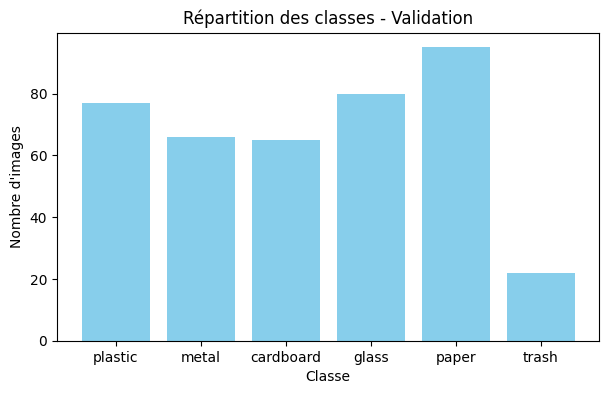

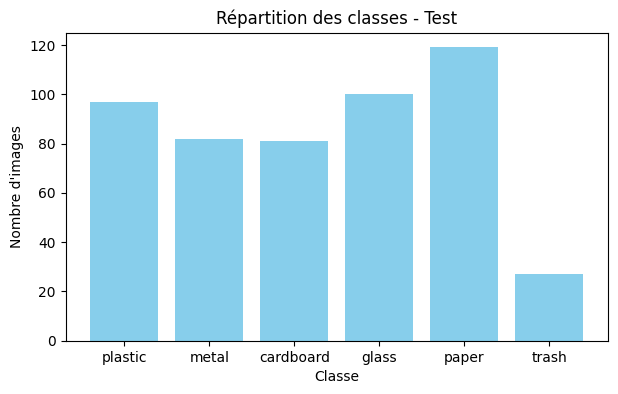

In [10]:
# 3. Visualisation de la répartition des classes dans chaque split
import matplotlib.pyplot as plt
from collections import Counter

def plot_class_distribution(labels, title):
    counter = Counter(labels)
    plt.figure(figsize=(7,4))
    plt.bar(counter.keys(), counter.values(), color='skyblue')
    plt.title(title)
    plt.xlabel("Classe")
    plt.ylabel("Nombre d'images")
    plt.show()

plot_class_distribution(train_labels, "Répartition des classes - Train")
plot_class_distribution(val_labels, "Répartition des classes - Validation")
plot_class_distribution(test_labels, "Répartition des classes - Test")

# (On ajouteras ensuite les étapes d'augmentation, normalisation, etc.)